In [ ]:
import getpass
import os

if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [ ]:
!pip install langchain-groq

In [ ]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, AIMessage

In [ ]:
llm = ChatGroq(
    model="openai/gpt-oss-20b",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2
)

In [ ]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

In [ ]:
llm_with_tools = llm.bind_tools([multiply])

In [ ]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 12312322 multiplied by 312321312", name="Lance")])

In [ ]:
tool_call

AIMessage(content='', additional_kwargs={'reasoning_content': "We need to multiply 12,312,322 by 312,321,312. That's large. We can use the function multiply.", 'tool_calls': [{'id': 'fc_4c782330-6268-4c78-8fc5-03f98a3e5055', 'function': {'arguments': '{"a":12312322,"b":312321312}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 139, 'total_tokens': 198, 'completion_time': 0.059016222, 'prompt_time': 0.007811699, 'queue_time': 0.201464415, 'total_time': 0.066827921}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_77f8660d1d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ef83b550-6fec-4ff7-bf9f-277eed68ddd7-0', tool_calls=[{'name': 'multiply', 'args': {'a': 12312322, 'b': 312321312}, 'id': 'fc_4c782330-6268-4c78-8fc5-03f98a3e5055', 'type': 'tool_call'}], usage_metadata={'input_tokens': 139, 'output_tokens': 59, 'total_tokens': 198})

In [ ]:
from langgraph.graph import MessagesState

In [ ]:
class MessagesState(MessagesState):
    pass

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [ ]:
def tool_calling_llm(state: MessagesState):
  return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [ ]:
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

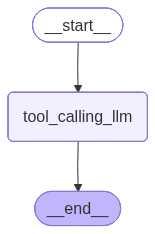

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!", name="Akash")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================
Name: Akash

Hello!
================================== Ai Message ==================================

Hello! How can I help you today?


In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3", name="Akash")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================
Name: Akash

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (fc_5848cb46-6f55-4dc2-afc0-a320b6a0698a)
 Call ID: fc_5848cb46-6f55-4dc2-afc0-a320b6a0698a
  Args:
    a: 2
    b: 3
